In [ ]:
!pip install numpy scikit-learn matplotlib

# 1. 線性回歸 Linear Regression（預測連續數值）

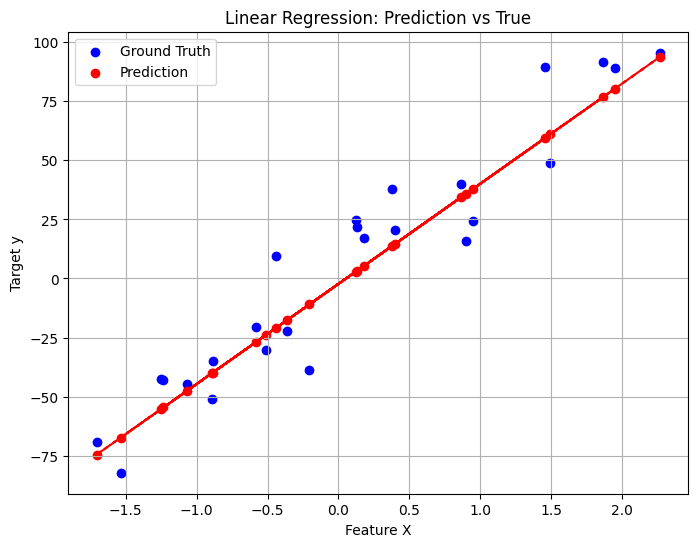

R² Score: 0.9069147939414584


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Ground Truth')
plt.scatter(X_test, y_pred, color='red', label='Prediction')
plt.plot(X_test, y_pred, color='red', linestyle='--')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Linear Regression: Prediction vs True")
plt.legend()
plt.grid(True)
plt.show()

print("R² Score:", r2_score(y_test, y_pred))


# 2. 邏輯回歸 Logistic Regression（二分類）

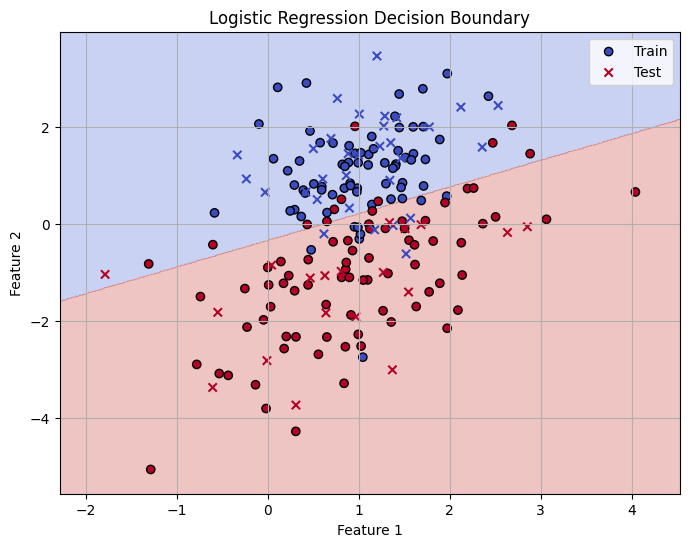

Confusion Matrix:
 [[26  5]
 [ 1 18]]
Accuracy Score: 0.88
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.78      0.95      0.86        19

    accuracy                           0.88        50
   macro avg       0.87      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Generate classification data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Decision boundary visualization
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', label='Test')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Metrics
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# 3. 支援向量機 SVM（線性分類）

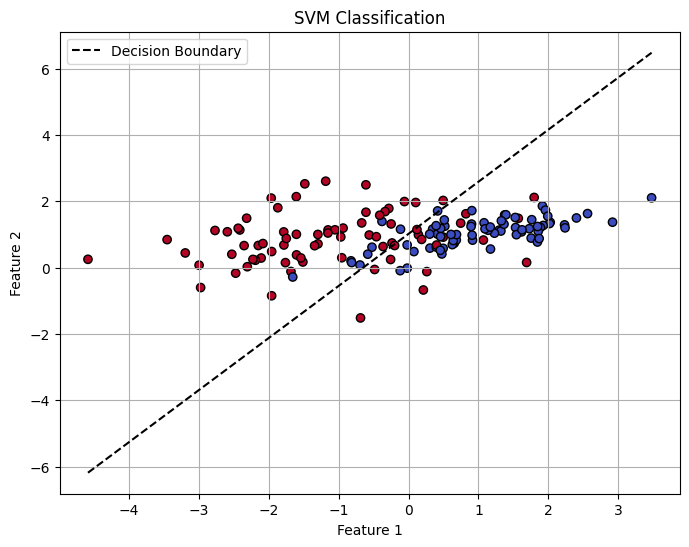

Confusion Matrix:
 [[19  2]
 [ 4 13]]
Accuracy Score: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.87      0.76      0.81        17

    accuracy                           0.84        38
   macro avg       0.85      0.83      0.84        38
weighted avg       0.84      0.84      0.84        38



In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Classification data
X, y = make_classification(n_samples=150, n_features=2, n_redundant=0, n_informative=2,
                           random_state=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Decision boundary
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (model.intercept_[0]) / w[1]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.plot(xx, yy, 'k--', label='Decision Boundary')
plt.title("SVM Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# 4. 隨機森林 Random Forest（非線性分類）

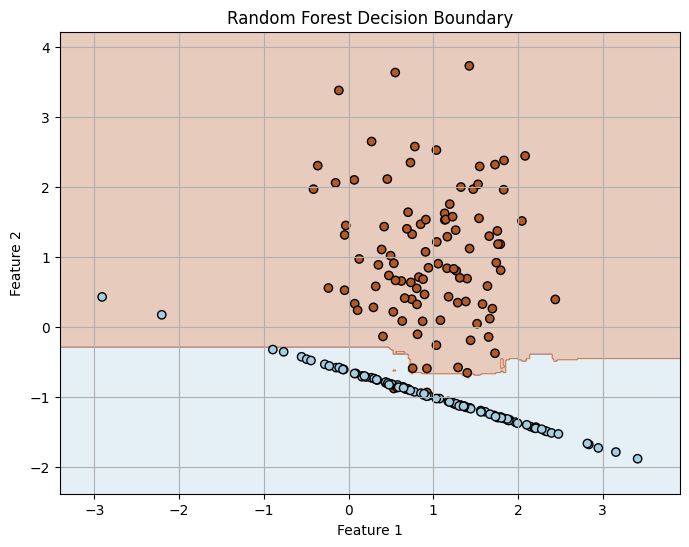

Confusion Matrix:
 [[24  2]
 [ 0 24]]
Accuracy Score: 0.96
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.92      1.00      0.96        24

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Decision boundary
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Random Forest Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
